<a href="https://colab.research.google.com/github/GarimaMahendru/MyRepository/blob/main/Bank_dataset_ans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [9]:
data=pd.read_csv("bank.csv", delimiter=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
data.dtypes[data.dtypes=='object'].index  # Extracting names of object variables

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [11]:
data.dtypes[data.dtypes!='object'].index  # Extracting names of numeric variables

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [60]:
num=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']

In [12]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [13]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
# Primary analysis of categorical variables

In [15]:
cat=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y']

In [24]:
def univariate_cat(data,x):
  unique_count=data[x].nunique()
  unique_values=data[x].unique()
  freq_dist=pd.DataFrame(data[x].value_counts().reset_index())

  print(f"unique counts of values {unique_count}")
  print(f"unique values {unique_values} \n")
  plt.figure(figsize=(15,5))



  sns.countplot(data=data, x=x, palette="Set1_r",
              hue=x, saturation=0.9)
  plt.show()
  return freq_dist

unique counts of values 12
unique values ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 



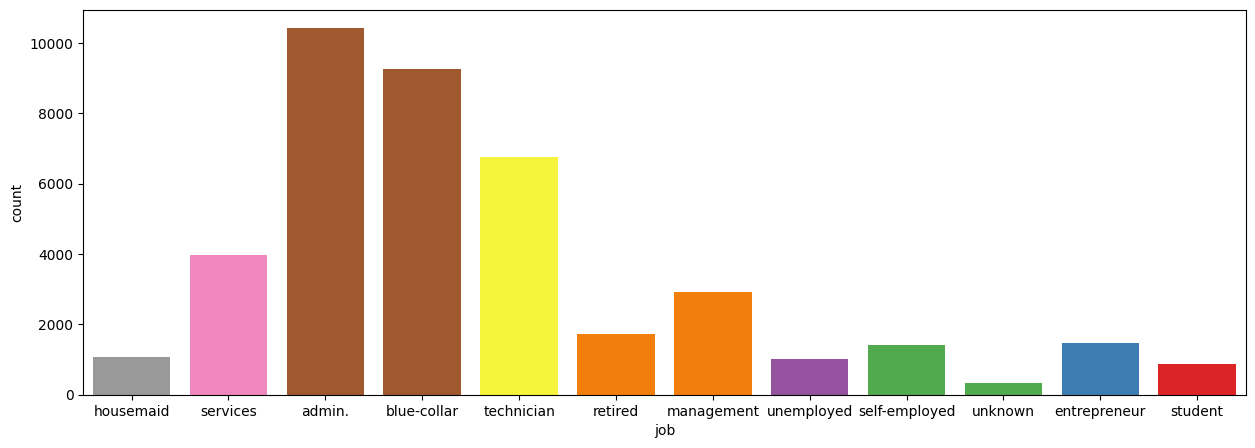

,job,count
0,admin.,10422
1,blue-collar,9254
2,technician,6743
3,services,3969
4,management,2924
5,retired,1720
6,entrepreneur,1456
7,self-employed,1421
8,housemaid,1060
9,unemployed,1014


In [25]:
univariate_cat(data,'job')

unique counts of values 4
unique values ['married' 'single' 'divorced' 'unknown'] 



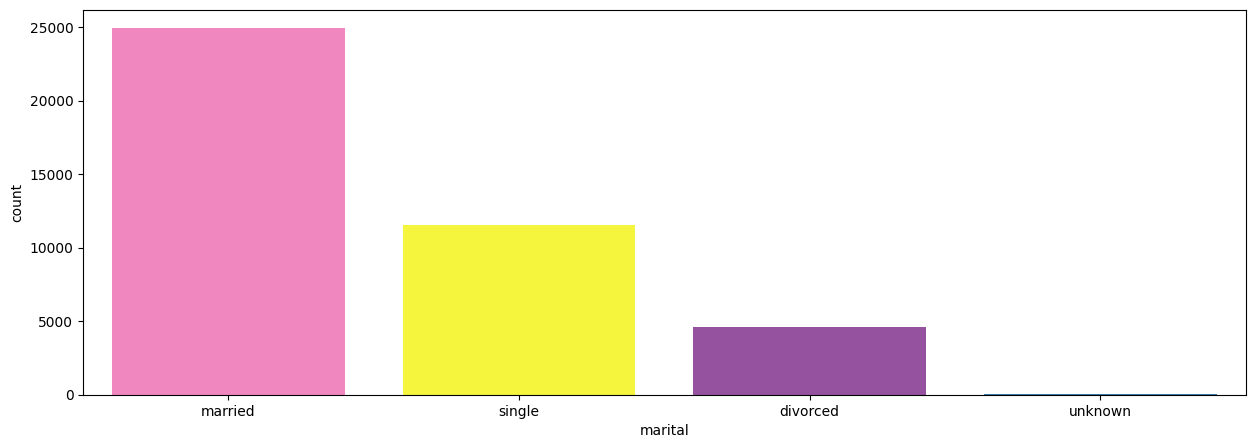

,marital,count
0,married,24928
1,single,11568
2,divorced,4612
3,unknown,80


In [26]:
univariate_cat(data,'marital')

unique counts of values 8
unique values ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 



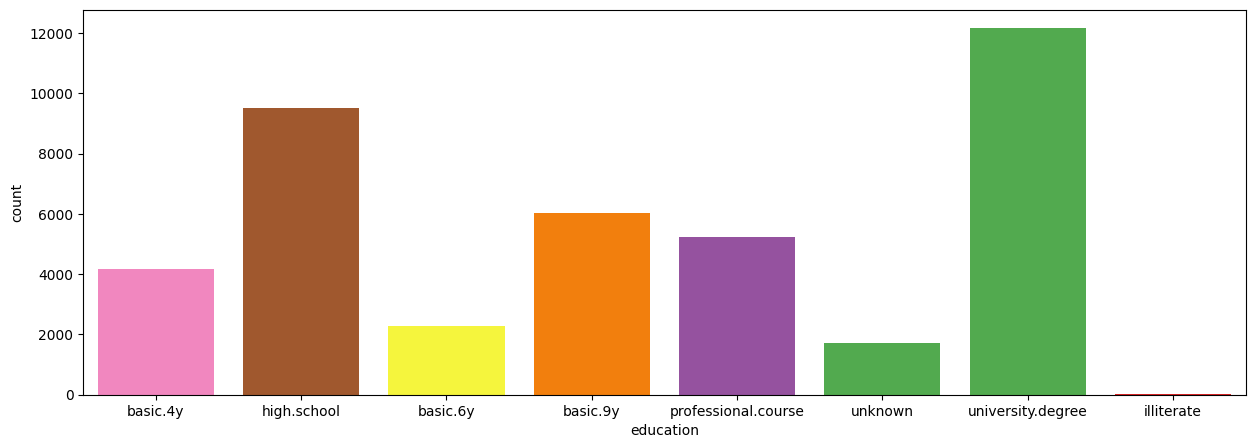

,education,count
0,university.degree,12168
1,high.school,9515
2,basic.9y,6045
3,professional.course,5243
4,basic.4y,4176
5,basic.6y,2292
6,unknown,1731
7,illiterate,18


In [27]:
univariate_cat(data,'education')

unique counts of values 3
unique values ['no' 'unknown' 'yes'] 



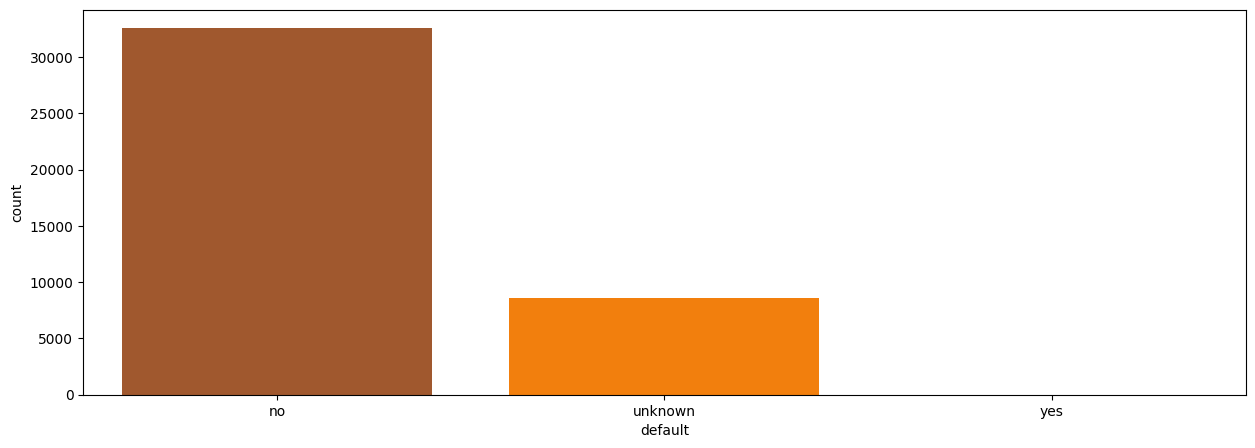

,default,count
0,no,32588
1,unknown,8597
2,yes,3


In [28]:
univariate_cat(data,'default')

unique counts of values 3
unique values ['no' 'yes' 'unknown'] 



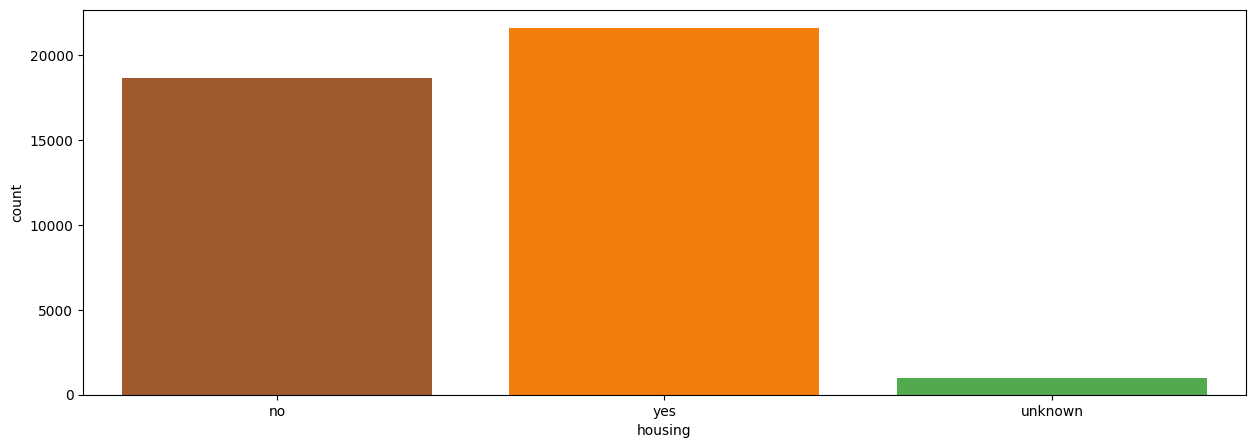

,housing,count
0,yes,21576
1,no,18622
2,unknown,990


In [29]:
univariate_cat(data,'housing')

unique counts of values 3
unique values ['no' 'yes' 'unknown'] 



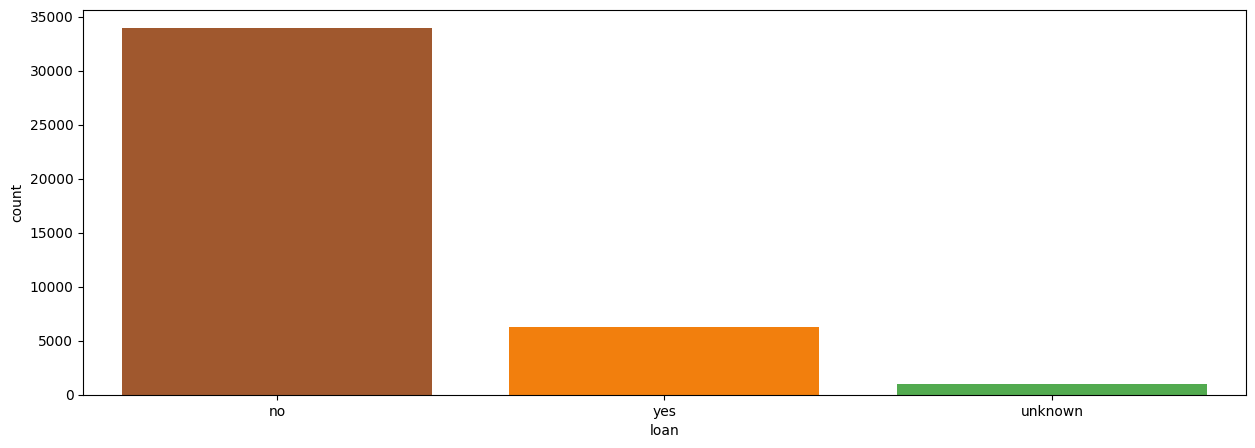

,loan,count
0,no,33950
1,yes,6248
2,unknown,990


In [30]:
univariate_cat(data,'loan')

unique counts of values 2
unique values ['telephone' 'cellular'] 



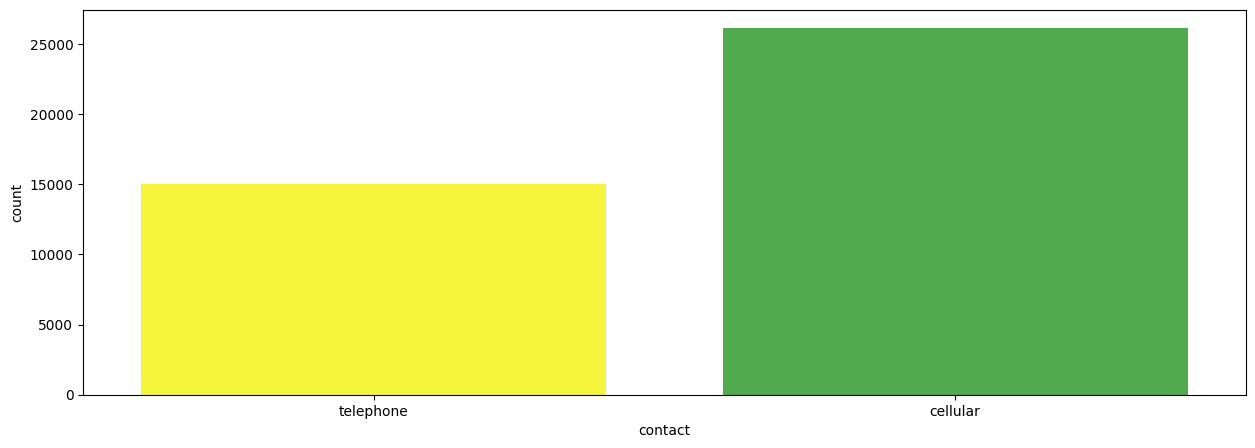

,contact,count
0,cellular,26144
1,telephone,15044


In [31]:
univariate_cat(data,'contact')

unique counts of values 10
unique values ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 



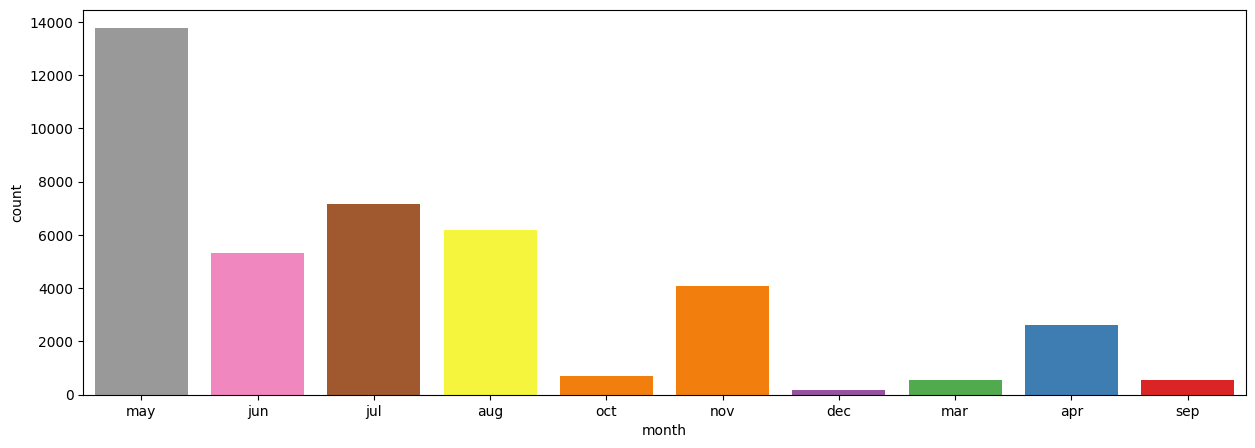

,month,count
0,may,13769
1,jul,7174
2,aug,6178
3,jun,5318
4,nov,4101
5,apr,2632
6,oct,718
7,sep,570
8,mar,546
9,dec,182


In [32]:
univariate_cat(data,'month')

unique counts of values 5
unique values ['mon' 'tue' 'wed' 'thu' 'fri'] 



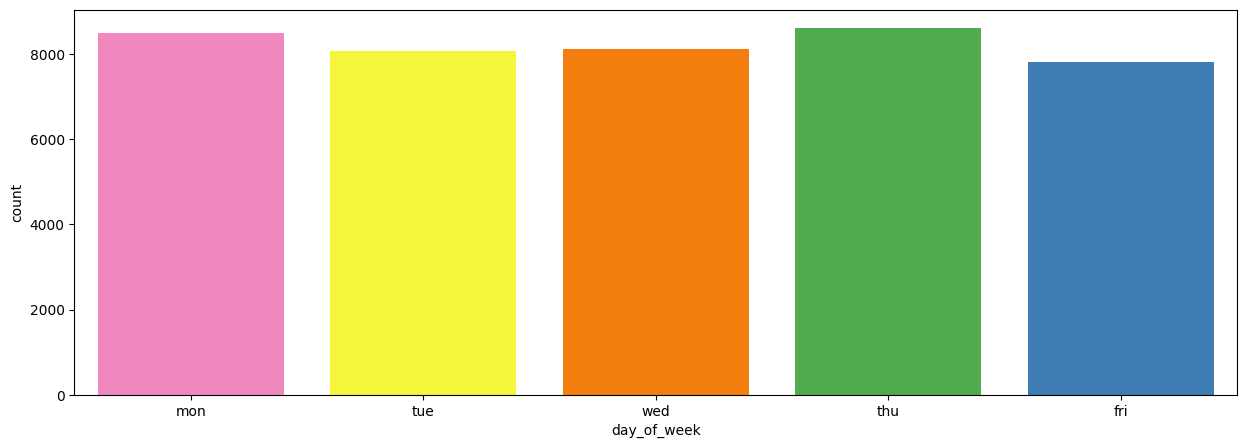

,day_of_week,count
0,thu,8623
1,mon,8514
2,wed,8134
3,tue,8090
4,fri,7827


In [33]:
univariate_cat(data,'day_of_week')

unique counts of values 3
unique values ['nonexistent' 'failure' 'success'] 



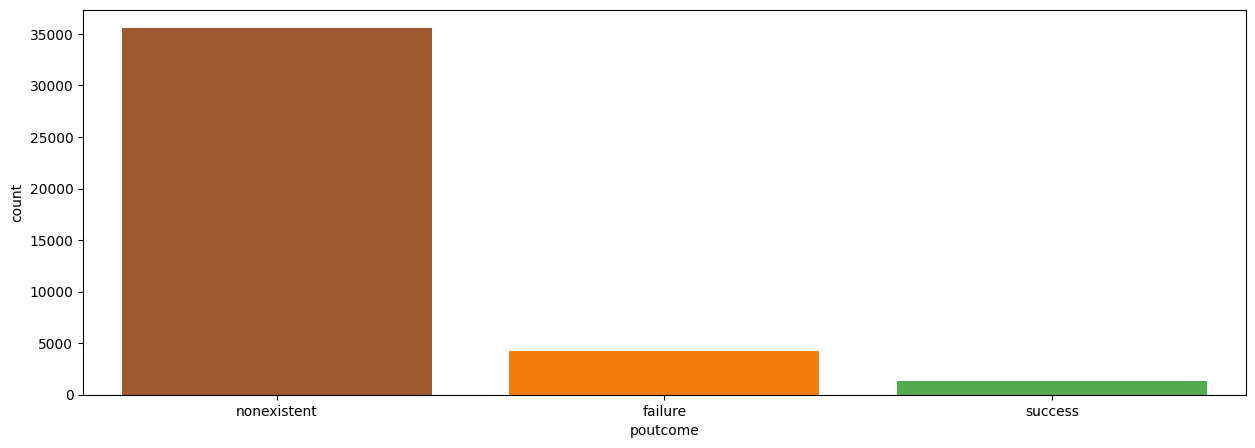

,poutcome,count
0,nonexistent,35563
1,failure,4252
2,success,1373


In [34]:
univariate_cat(data,'poutcome')

unique counts of values 2
unique values ['no' 'yes'] 



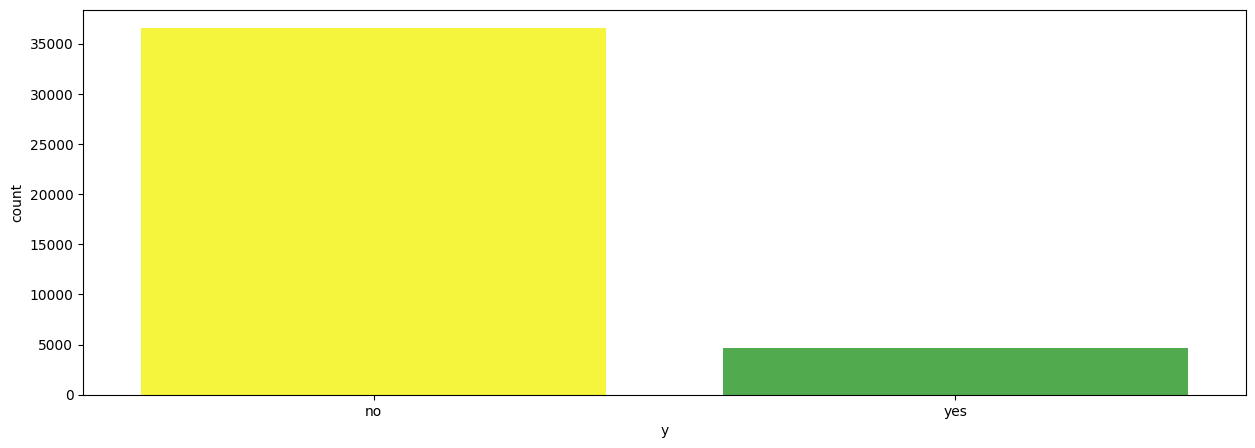

,y,count
0,no,36548
1,yes,4640


In [35]:
univariate_cat(data,'y')

In [ ]:
# Chi square test to check relationship of categorical variables with target variable (y)

In [37]:
from scipy import stats
dg=[]
for i in cat: # This loop will extract one variable at a time from the list we made above
  ct=pd.crosstab(data[i], data["y"])  # The cross tab is essential for this test as it provides the observed frequencies required to calculate the Chi-square statistic.
  p=stats.chi2_contingency(ct)[1]
  if p<0.05:
    print(f"There is Relationship between {i} and y ")
    dg.append((i,data["y"]))
  else:
    print(f"There is no Relationship between {i} and y ")

There is Relationship between job and y 
There is Relationship between marital and y 
There is Relationship between education and y 
There is Relationship between default and y 
There is no Relationship between housing and y 
There is no Relationship between loan and y 
There is Relationship between contact and y 
There is Relationship between month and y 
There is Relationship between day_of_week and y 
There is Relationship between poutcome and y 
There is Relationship between y and y 


In [38]:
# Since there is no relationship between housing and loan with target variable we can drop these columns

In [39]:
data.drop(['housing','loan'], axis=1, inplace=True)

In [40]:
data.dtypes[data.dtypes=='object'].index

Index(['job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [42]:
# Missing value analysis

In [41]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [43]:
# There are no missing values in the data

In [44]:
# Label Encoding

In [45]:
label_encoder = LabelEncoder()
data["job"] = label_encoder.fit_transform(data["job"])


In [46]:
data["month"] = label_encoder.fit_transform(data["month"])

In [47]:
data["day_of_week"] = label_encoder.fit_transform(data["day_of_week"])

In [48]:
data

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,basic.4y,no,telephone,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,married,high.school,unknown,telephone,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,married,high.school,no,telephone,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,married,basic.6y,no,telephone,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,married,high.school,no,telephone,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,married,professional.course,no,cellular,7,0,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,married,professional.course,no,cellular,7,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,married,university.degree,no,cellular,7,0,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9,married,professional.course,no,cellular,7,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
data["y"]= label_encoder.fit_transform(data["y"])

In [50]:
data

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,basic.4y,no,telephone,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,married,high.school,unknown,telephone,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,married,high.school,no,telephone,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,married,basic.6y,no,telephone,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,married,high.school,no,telephone,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,married,professional.course,no,cellular,7,0,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,married,professional.course,no,cellular,7,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,married,university.degree,no,cellular,7,0,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,married,professional.course,no,cellular,7,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [51]:
data.dtypes[data.dtypes=='object'].index

Index(['marital', 'education', 'default', 'contact', 'poutcome'], dtype='object')

In [54]:
num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [55]:
# Univariate analysis of numerical data

In [56]:
data[num].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,55.000,58.000,71.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,551.000,752.650,1271.130,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,5.000,7.000,14.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,1.000,1.000,2.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400,1.400,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.465,94.465,94.465,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-36.100,-33.600,-26.900,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,4.964,4.966,4.968,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100


In [58]:
# Correlation of numerical data with y

In [63]:
data[num].corr().y

age               0.030399
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
y                 1.000000
Name: y, dtype: float64

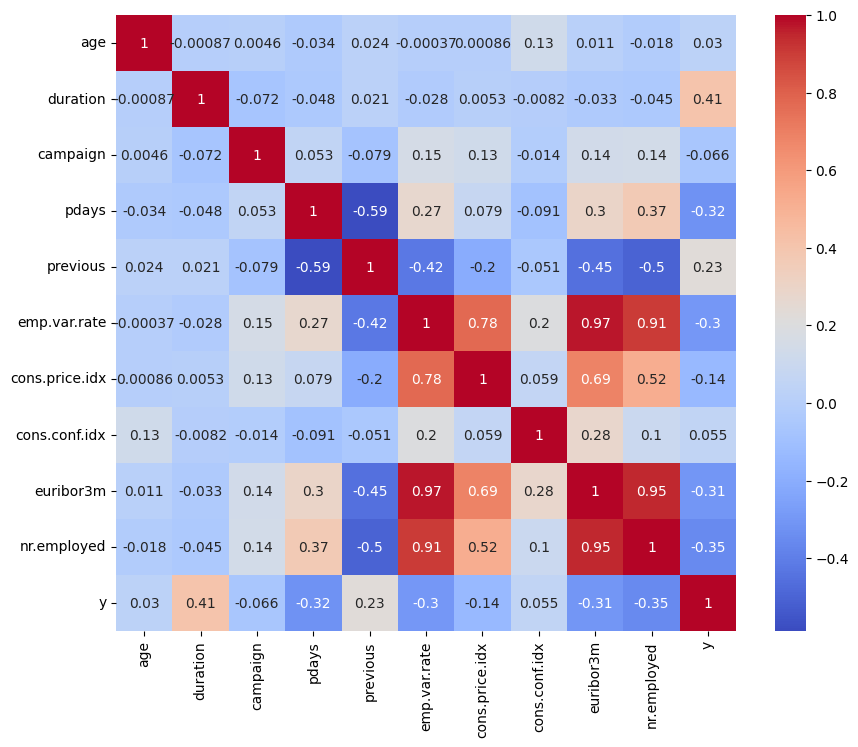

In [64]:
plt.figure(figsize=(10,8))
s=data[num].corr()
sns.heatmap(s,cmap="coolwarm", annot=True)
plt.show()

In [66]:
# emp_var_rate and cons price index have high correlation
# Euribor and emp var rate have high high correlation
# nr employed and emp var rate have high correlation
# euribor and nr employed have high correlation


In [67]:
data.drop(['emp.var.rate','cons.price.idx','euribor3m'], axis=1, inplace=True)

In [68]:
data.shape

(41188, 16)

In [69]:
data

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,nr.employed,y
0,56,3,married,basic.4y,no,telephone,6,1,261,1,999,0,nonexistent,-36.4,5191.0,0
1,57,7,married,high.school,unknown,telephone,6,1,149,1,999,0,nonexistent,-36.4,5191.0,0
2,37,7,married,high.school,no,telephone,6,1,226,1,999,0,nonexistent,-36.4,5191.0,0
3,40,0,married,basic.6y,no,telephone,6,1,151,1,999,0,nonexistent,-36.4,5191.0,0
4,56,7,married,high.school,no,telephone,6,1,307,1,999,0,nonexistent,-36.4,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,married,professional.course,no,cellular,7,0,334,1,999,0,nonexistent,-50.8,4963.6,1
41184,46,1,married,professional.course,no,cellular,7,0,383,1,999,0,nonexistent,-50.8,4963.6,0
41185,56,5,married,university.degree,no,cellular,7,0,189,2,999,0,nonexistent,-50.8,4963.6,0
41186,44,9,married,professional.course,no,cellular,7,0,442,1,999,0,nonexistent,-50.8,4963.6,1


In [70]:
# outlier treatment

In [71]:
num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [72]:
num=['age',
 'duration',
 'campaign',
 'pdays',
 'previous','cons.conf.idx','nr.employed']

Results for age------------------



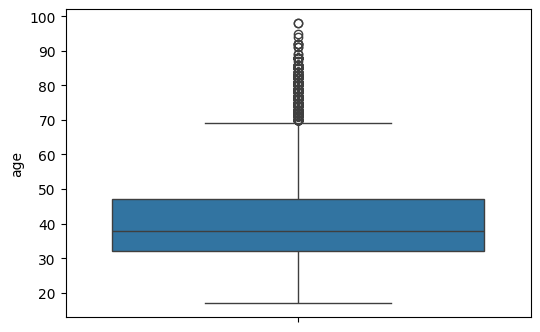

Results for duration------------------



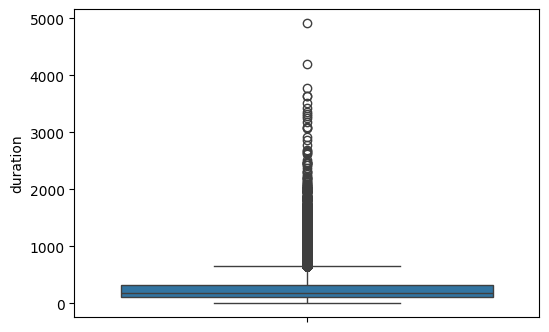

Results for campaign------------------



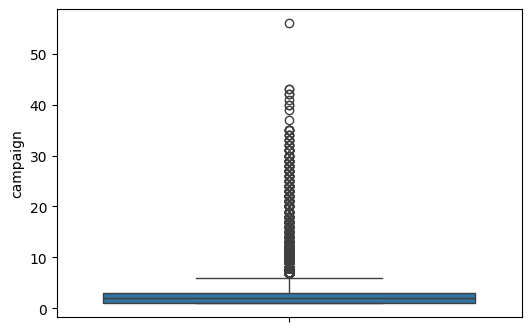

Results for pdays------------------



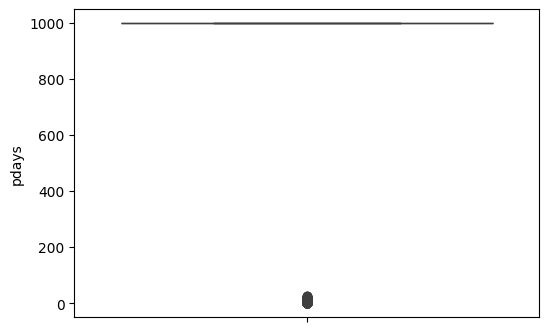

Results for previous------------------



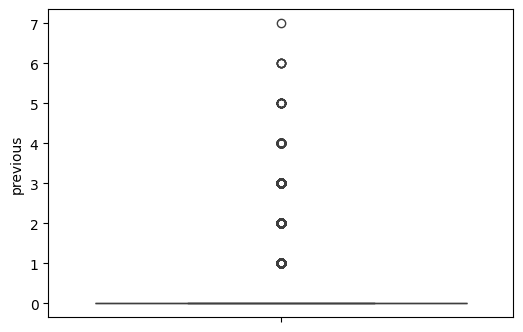

Results for cons.conf.idx------------------



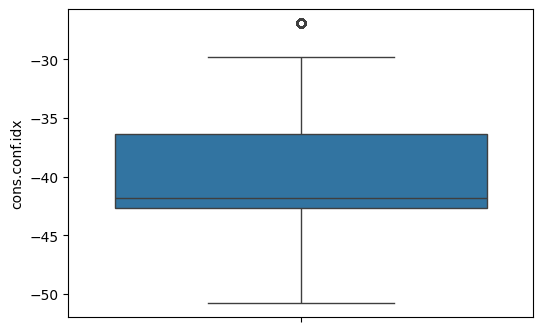

Results for nr.employed------------------



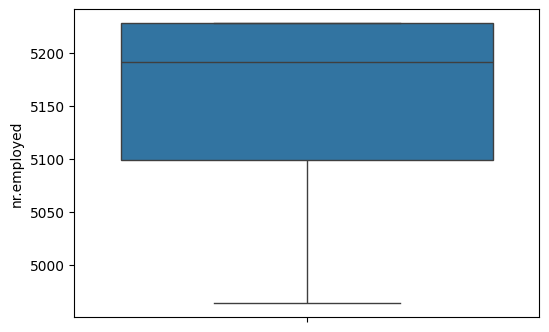

In [73]:
for i in num:
  print(f"Results for {i}------------------\n")
  plt.figure(figsize=(6,4))
  sns.boxplot(data[i]) # Plotting box plot for numerical variables to check for outliers
  plt.show()

In [74]:
def outlier_method1(x):
  x=x.clip(upper=x.quantile(.95)) # Clipping upper bond at 95 percentile to eliminate outliers
  # x=x.clip(lower=x.quantile(.01))
  return x

In [75]:
data[num]=data[num].apply(outlier_method1)

In [76]:
data

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,nr.employed,y
0,56,3,married,basic.4y,no,telephone,6,1,261.0,1,999,0,nonexistent,-36.4,5191.0,0
1,57,7,married,high.school,unknown,telephone,6,1,149.0,1,999,0,nonexistent,-36.4,5191.0,0
2,37,7,married,high.school,no,telephone,6,1,226.0,1,999,0,nonexistent,-36.4,5191.0,0
3,40,0,married,basic.6y,no,telephone,6,1,151.0,1,999,0,nonexistent,-36.4,5191.0,0
4,56,7,married,high.school,no,telephone,6,1,307.0,1,999,0,nonexistent,-36.4,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,58,5,married,professional.course,no,cellular,7,0,334.0,1,999,0,nonexistent,-50.8,4963.6,1
41184,46,1,married,professional.course,no,cellular,7,0,383.0,1,999,0,nonexistent,-50.8,4963.6,0
41185,56,5,married,university.degree,no,cellular,7,0,189.0,2,999,0,nonexistent,-50.8,4963.6,0
41186,44,9,married,professional.course,no,cellular,7,0,442.0,1,999,0,nonexistent,-50.8,4963.6,1


In [77]:
data.dtypes[data.dtypes=='object'].index

Index(['marital', 'education', 'default', 'contact', 'poutcome'], dtype='object')

In [78]:
cat=['marital', 'education', 'default', 'contact', 'poutcome']

In [79]:
# Dummy creation

In [83]:
final_data=pd.get_dummies(data, columns=['marital', 'education', 'default', 'contact', 'poutcome'],dtype='int')

In [85]:
final_data.dtypes

age                                int64
job                                int64
month                              int64
day_of_week                        int64
duration                         float64
campaign                           int64
pdays                              int64
previous                           int64
cons.conf.idx                    float64
nr.employed                      float64
y                                  int64
marital_divorced                   int64
marital_married                    int64
marital_single                     int64
marital_unknown                    int64
education_basic.4y                 int64
education_basic.6y                 int64
education_basic.9y                 int64
education_high.school              int64
education_illiterate               int64
education_professional.course      int64
education_university.degree        int64
education_unknown                  int64
default_no                         int64
default_unknown 

In [86]:
x=final_data.drop('y', axis=1)
y=final_data['y']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)

In [88]:
# Rescalling data using min max scalar

In [89]:
mmx=MinMaxScaler()
x_train_new=mmx.fit_transform(x_train)
x_test_new=mmx.transform(x_test)
x_train_new=pd.DataFrame(x_train_new, columns=x_train.columns)
x_test_new=pd.DataFrame(x_test_new, columns=x_train.columns)

In [90]:
# Logistic regression

In [91]:
log_reg=LogisticRegression()
log_reg.fit(x_train_new,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
pred_train=log_reg.predict(x_train_new)
pred_test=log_reg.predict(x_test_new)

In [93]:
confusion_test=pd.DataFrame(metrics.confusion_matrix(y_test, pred_test),
             index=["act0", "act1"],columns=["pred0", "pred1"])
confusion_test

,pred0,pred1
act0,10671,278
act1,839,569


In [94]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25599
           1       0.66      0.40      0.50      3232

    accuracy                           0.91     28831
   macro avg       0.79      0.69      0.72     28831
weighted avg       0.90      0.91      0.90     28831



In [95]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10949
           1       0.67      0.40      0.50      1408

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [96]:
# Decision tree

In [97]:
dt=DecisionTreeClassifier(random_state=55)
dt.fit(x_train_new, y_train)

DecisionTreeClassifier(random_state=55)

In [99]:
print("Train score :", dt.score(x_train_new, y_train))
print("Test score :", dt.score(x_test_new, y_test))

Train score : 0.9996184662342618
Test score : 0.8865420409484502


In [100]:
# Grid search for best parameters

In [101]:
%timeit
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split':[10,50,100,150],
              'max_depth':[10,15,20,25,30],
              "min_samples_leaf":[100,200,300],
             }
tr = DecisionTreeClassifier(random_state=55)
gsearch = GridSearchCV(estimator=tr, param_grid=parameters, cv=10,  n_jobs=-1, scoring="accuracy")

gsearch.fit(x_train_new, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=55),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [100, 200, 300],
                         'min_samples_split': [10, 50, 100, 150]},
             scoring='accuracy')

In [102]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 10}

In [103]:
gsearch.best_score_

0.9114841750122556

In [105]:
dt2=DecisionTreeClassifier(max_depth=10,
                           criterion="entropy",
                           min_samples_split=10,
                            min_samples_leaf= 100
                           )
dt2.fit(x_train_new, y_train)

print("Train accuracy:", dt2.score(x_train_new,y_train))

print("Test accuracy:", dt2.score(x_test_new,y_test))

Train accuracy: 0.9152995040061045
Test accuracy: 0.9099295945617868


In [107]:
# Important features

In [106]:
dt2.feature_importances_

array([6.87067037e-03, 5.63044260e-03, 8.37300240e-03, 7.35159905e-03,
       5.13660658e-01, 6.77462572e-03, 4.34665094e-03, 0.00000000e+00,
       1.05572937e-01, 3.09205123e-01, 0.00000000e+00, 2.56849255e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.67031570e-03, 0.00000000e+00, 0.00000000e+00, 4.27725259e-04,
       0.00000000e+00, 7.50387791e-03, 0.00000000e+00, 1.21058413e-03,
       0.00000000e+00, 2.11449375e-02])

In [108]:
Feat_imp=pd.DataFrame({"Features":x_train_new.columns, "imp":dt2.feature_importances_}).sort_values(by=["imp"],ascending=False)

In [109]:
Feat_imp

,Features,imp
4,duration,0.513661
9,nr.employed,0.309205
8,cons.conf.idx,0.105573
29,poutcome_success,0.021145
2,month,0.008373
25,contact_cellular,0.007504
3,day_of_week,0.007352
0,age,0.006871
5,campaign,0.006775
1,job,0.005630


In [111]:
Feat_imp[Feat_imp["imp"]>=0.0002]["Features"].values # Extracting names of the features that has more importance than 0.0002


array(['duration', 'nr.employed', 'cons.conf.idx', 'poutcome_success',
       'month', 'contact_cellular', 'day_of_week', 'age', 'campaign',
       'job', 'pdays', 'education_university.degree', 'poutcome_failure',
       'default_unknown', 'marital_married'], dtype=object)

In [115]:
pred_train=dt2.predict(x_train_new)   # Classes , (1,0)
pred_test=dt2.predict(x_test_new)
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))

0.9152995040061045
0.9099295945617868


In [116]:
pd.DataFrame(metrics.confusion_matrix(y_train, pred_train), index=["Act0", "Act1"], columns=["pred0", "pred1"]) # Confusion matrix for train data

,pred0,pred1
Act0,24820,779
Act1,1663,1569


In [117]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred_test), index=["Act0", "Act1"], columns=["pred0", "pred1"]) # Confusion matrix for test data

,pred0,pred1
Act0,10577,372
Act1,741,667


In [118]:
print(metrics.classification_report(y_train, pred_train)) # Classification report for train data


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     25599
           1       0.67      0.49      0.56      3232

    accuracy                           0.92     28831
   macro avg       0.80      0.73      0.76     28831
weighted avg       0.91      0.92      0.91     28831



In [119]:
print(metrics.classification_report(y_test, pred_test)) # Classification report for test data

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10949
           1       0.64      0.47      0.55      1408

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [120]:
# Random Forest Classifier

In [128]:
import time
tic=time.time()
rf=RandomForestClassifier(n_estimators=50, min_samples_split=200, max_depth=9,bootstrap=True)
rf.fit(x_train_new, y_train)
toc=time.time()
print("Time Taken ", toc-tic)

Time Taken  1.3332438468933105


In [129]:
# evaluation
print("train", rf.score(x_train_new, y_train))
print("test", rf.score(x_test_new, y_test))

train 0.9060039540772086
test 0.9016751638747269


In [124]:
# Handling imbalanced data using smote

In [125]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

In [126]:
smt=SMOTE(k_neighbors=7)

In [127]:
X_train_smt, y_train_smt=smt.fit_resample(x_train_new, y_train)

In [130]:
tic=time.time()
rf1=RandomForestClassifier(n_estimators=50, min_samples_split=200, max_depth=9,bootstrap=True)
rf1.fit(X_train_smt, y_train_smt)
toc=time.time()
print("Time Taken ", toc-tic)

Time Taken  4.00213623046875


In [131]:
print("Train Accuracy: ", rf1.score(X_train_smt, y_train_smt))
print("Test Accuracy: ", rf1.score(x_test_new, y_test))

Train Accuracy:  0.9171452009844134
Test Accuracy:  0.8731892854252651


In [132]:
# Important features using Random forest

In [133]:
pd.DataFrame({"Var":X_train_smt.columns,\
              "Imp": rf1.feature_importances_}).sort_values(by=["Imp"], ascending=False)

,Var,Imp
4,duration,4.170410e-01
9,nr.employed,2.144908e-01
8,cons.conf.idx,8.293072e-02
2,month,5.567519e-02
6,pdays,4.666259e-02
5,campaign,3.280279e-02
29,poutcome_success,2.619166e-02
26,contact_telephone,1.963486e-02
25,contact_cellular,1.889397e-02
7,previous,1.768121e-02


In [135]:
pred_train_smt=rf1.predict(X_train_smt)
pred_test_smt=rf1.predict(x_test_new)
print(metrics.classification_report(y_train_smt, pred_train_smt))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     25599
           1       0.88      0.97      0.92     25599

    accuracy                           0.92     51198
   macro avg       0.92      0.92      0.92     51198
weighted avg       0.92      0.92      0.92     51198



In [136]:
print(metrics.classification_report(y_test, pred_test_smt))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     10949
           1       0.47      0.91      0.62      1408

    accuracy                           0.87     12357
   macro avg       0.73      0.89      0.77     12357
weighted avg       0.93      0.87      0.89     12357



In [ ]:
# Random forest classifier performs the best as it gives the highest precision, recall and equal accuracy as compared to logistic regression
# and decision tree classifier